<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/week9/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODUL 10 – Thresholding, Segmentasi Sederhana

Nama: Annisa Eka Puspita

Kelas: TI-3H

Absen: 02

NIM: 2341720131


D. TUGAS PRAKTIKUM

 1. Import beberapa library berikut yang akan digunakan selama uji coba

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

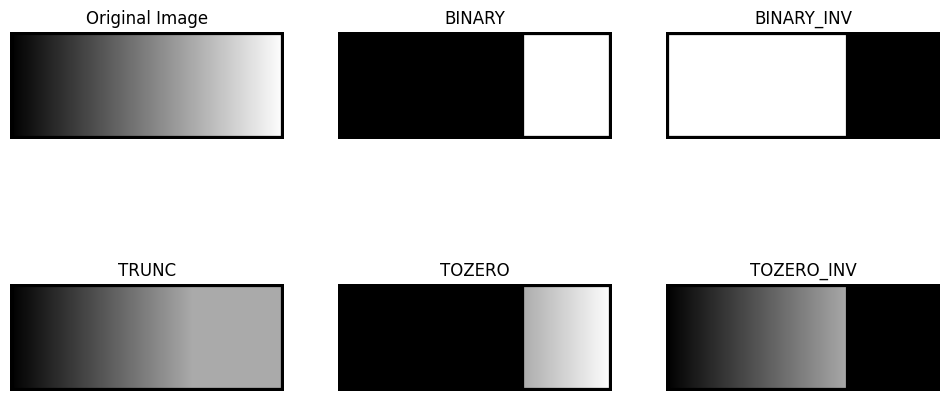

In [39]:
# Buat citra gradasi dari hitam ke putih
img = np.zeros((100, 256), dtype=np.uint8)
for i in range(256):
    img[:, i] = i

# Nilai threshold global
thresh = 170

# Manual thresholding
_, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(img, thresh, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO_INV)

# Daftar hasil dan judul
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

outlined_images = []

for im in images:
    # Ubah ke BGR untuk menggambar outline berwarna
    outlined = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

    # Cari kontur pada gambar hasil threshold
    contours, _ = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Gambar kontur hitam dengan ketebalan 3px
    cv2.drawContours(outlined, contours, -1, (0, 0, 0), 3)

    outlined_images.append(outlined)

# Tampilkan hasil
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(outlined_images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


3. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nilai threshold Otsu = 163


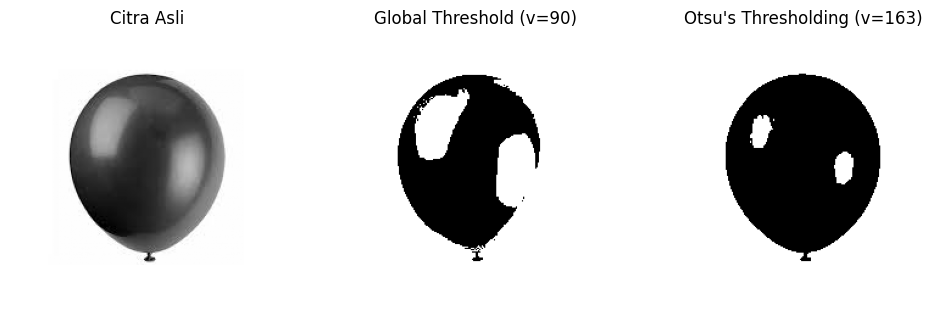

In [41]:
# Baca gambar balloon.jpg dalam grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/img/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# --- Global Threshold biasa ---
global_thresh = 90
_, global_result = cv2.threshold(img, global_thresh, 255, cv2.THRESH_BINARY)

# --- Otsu Threshold manual ---
hist, bins = np.histogram(img.ravel(), 256, [0,256])
total = img.shape[0] * img.shape[1]

current_max, threshold = 0, 0
sum_total, sum_foreground = 0, 0
weight_background, weight_foreground = 0, 0

for i in range(256):
    sum_total += i * hist[i]

for i in range(256):
    weight_background += hist[i]
    if weight_background == 0:
        continue
    weight_foreground = total - weight_background
    if weight_foreground == 0:
        break

    sum_foreground += i * hist[i]
    mean_background = sum_foreground / weight_background
    mean_foreground = (sum_total - sum_foreground) / weight_foreground

    between_var = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

    if between_var > current_max:
        current_max = between_var
        threshold = i

print("Nilai threshold Otsu =", threshold)

# Terapkan threshold Otsu yang ditemukan
_, otsu_result = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# --- Tampilkan hasil ---
titles = ['Citra Asli', f'Global Threshold (v={global_thresh})', f"Otsu's Thresholding (v={threshold})"]
images = [img, global_result, otsu_result]

plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


4. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja.

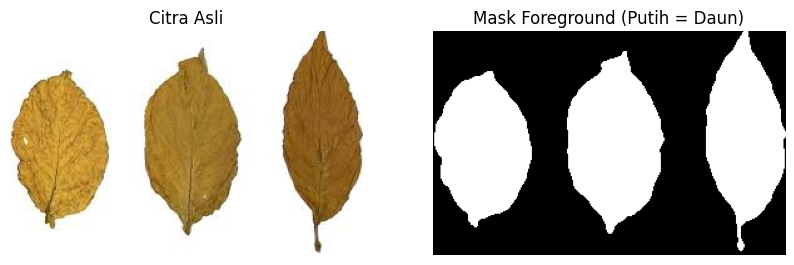

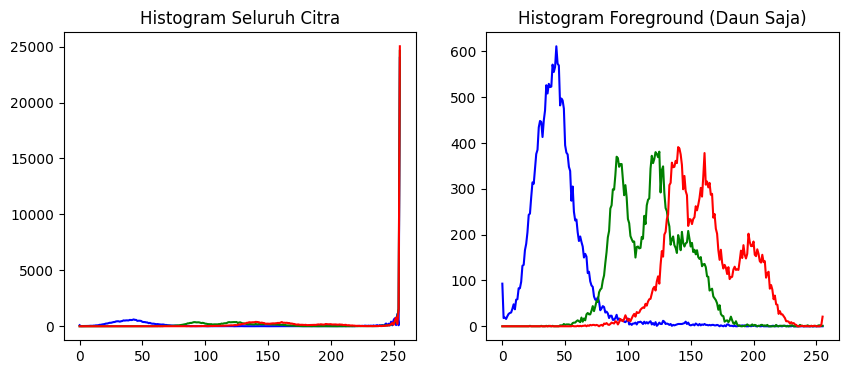

In [42]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/img/leaves.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Balik threshold agar daun putih (foreground), background hitam
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Haluskan tepi daun
mask = cv2.medianBlur(mask, 5)

# Tampilkan citra asli dan mask
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask Foreground (Putih = Daun)")
plt.axis("off")
plt.show()

# Histogram keseluruhan
color = ('b', 'g', 'r')
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
plt.title("Histogram Seluruh Citra")

# Histogram hanya foreground (daun)
plt.subplot(1,2,2)
for i, col in enumerate(color):
    hist_mask = cv2.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist_mask, color=col)
plt.title("Histogram Foreground (Daun Saja)")
plt.show()


5. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

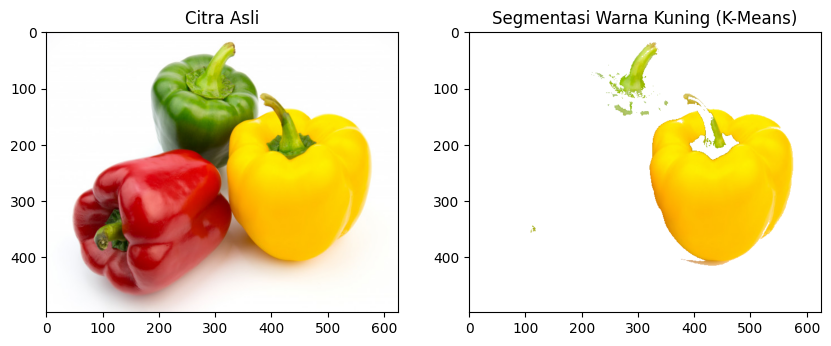

In [43]:
# --- 1. Baca gambar ---
img = cv2.imread('/content/drive/MyDrive/PCVK/img/peppers.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- 2. Ubah menjadi data 2D untuk K-Means ---
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# --- 3. Tentukan k dan jalankan K-Means ---
k = 3  # jumlah cluster warna
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# --- 4. Konversi pusat cluster ke uint8 ---
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# --- 5. Temukan cluster yang paling mendekati warna kuning ---
# Warna kuning dalam RGB kira-kira (255, 255, 0)
yellow_rgb = np.array([255, 255, 0])

# Hitung jarak antara setiap pusat cluster dengan warna kuning
distances = np.linalg.norm(centers - yellow_rgb, axis=1)
yellow_cluster_idx = np.argmin(distances)

# --- 6. Buat masker hanya untuk cluster warna kuning ---
mask = (labels.flatten() == yellow_cluster_idx)
mask = mask.reshape(img.shape[:2])

# --- 7. Tampilkan hanya warna kuning, lainnya jadi putih ---
result = img.copy()
result[~mask] = [255, 255, 255]  # ubah non-kuning jadi putih

# --- 8. Tampilkan hasil ---
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Segmentasi Warna Kuning (K-Means)')
plt.show()

Saat melakukan segmentasi warna kuning pada gambar paprika menggunakan metode K-Means, kendala yang muncul adalah hasilnya tidak hanya menampilkan bagian kuning saja, tetapi juga sebagian warna hijau dan area pantulan cahaya putih ikut terdeteksi. Selain itu, beberapa bagian kuning tidak sepenuhnya muncul karena adanya perbedaan pencahayaan dan gradasi warna pada permukaan paprika. Hal ini terjadi karena K-Means mengelompokkan piksel hanya berdasarkan kesamaan warna, tanpa mempertimbangkan faktor intensitas cahaya atau variasi saturasi pada gambar.

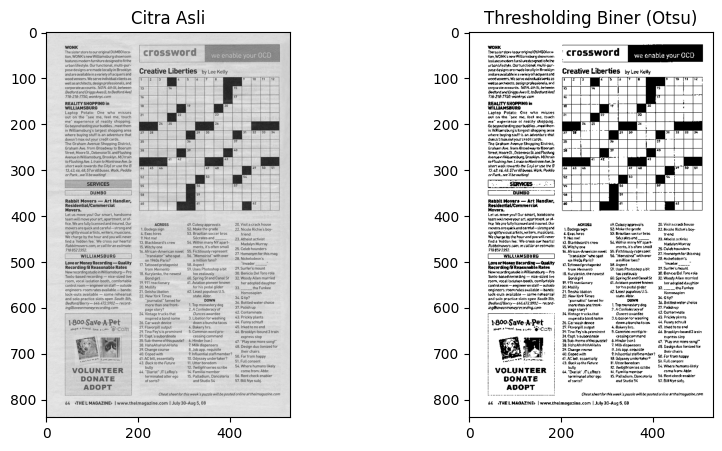

In [44]:
# Baca gambar grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/img/crossword.jpg', 0)

# Metode Otsu otomatis menentukan nilai ambang terbaik
_, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1,2,2)
plt.imshow(thresh_otsu, cmap='gray')
plt.title('Thresholding Biner (Otsu)')
plt.show()